## Figure of section2

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

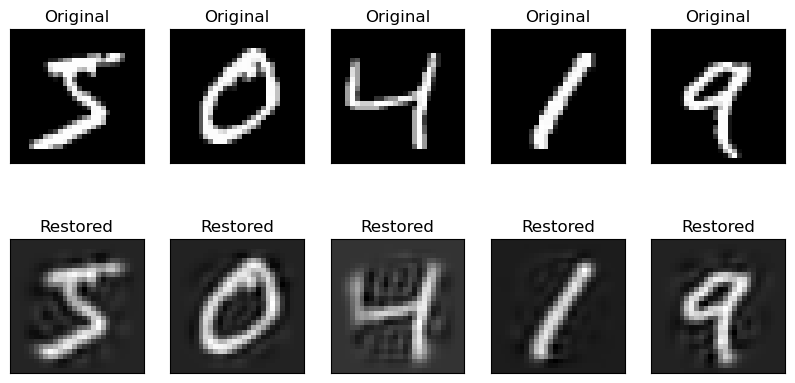

In [15]:

# MNISTデータセットを読み込む
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# データの前処理
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# PCAを使ってデータを100次元に圧縮する
pca = PCA(n_components=100)
train_images_pca = pca.fit_transform(train_images)
test_images_pca = pca.transform(test_images)

# 標準化
scaler = StandardScaler()
train_images_std = scaler.fit_transform(train_images_pca)
test_images_std = scaler.transform(test_images_pca)


# 逆変換して元の次元に
train_images_restored_ = scaler.inverse_transform(train_images_std)
test_images_restored_ = scaler.inverse_transform(test_images_std)
train_images_restored = pca.inverse_transform(train_images_restored_)
test_images_restored = pca.inverse_transform(test_images_restored_)

# 元画像と逆変換した画像を比較する
n = 5  # 表示する画像の数
plt.figure(figsize=(10, 5))

for i in range(n):
    # オリジナルの画像
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # PCAで圧縮して逆変換した画像
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(train_images_restored[i].reshape(28, 28), cmap='gray')
    plt.title("Restored")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
